# **Model Setup**

### Loading packages and defining parameters:

In [2]:
import pickle
import os
from sympy import Identity, symarray

from PyTransport import PyTransSetup

In [3]:
nF, nP = 2, 3  # Number of fields and parameters
f, p = symarray('f', nF), symarray('p', nP)

### Potential and field-space metric:

In [4]:
V = p[0]/2 * p[2]**2 * (f[0]**2 + p[1]*f[1]**2) # Here, p is [alpha, R, mphi] and f is [phi, chi]
G = 6 * p[0] / (1-f[0]**2-f[1]**2)**2 * Identity(2)

### PyTransport setup:

In [5]:
PyTransSetup.potential(V, nF, nP, False, G) # Converts potential defined above to C++ code
PyTransSetup.compileName3("Angular", True)  # Compiles a package called PyTransAngular with many useful functions

running install
running build
running build_ext
building 'PyTransAngular' extension
creating build
creating build/temp.linux-x86_64-3.8
creating build/temp.linux-x86_64-3.8/home
creating build/temp.linux-x86_64-3.8/home/gsalinas
creating build/temp.linux-x86_64-3.8/home/gsalinas/GitHub
creating build/temp.linux-x86_64-3.8/home/gsalinas/GitHub/angular
creating build/temp.linux-x86_64-3.8/home/gsalinas/GitHub/angular/PyTransport
creating build/temp.linux-x86_64-3.8/home/gsalinas/GitHub/angular/PyTransport/PyTrans
creating build/temp.linux-x86_64-3.8/home/gsalinas/GitHub/angular/PyTransport/CppTrans
creating build/temp.linux-x86_64-3.8/home/gsalinas/GitHub/angular/PyTransport/CppTrans/stepper
gcc -Wno-unused-result -Wsign-compare -DNDEBUG -g -fwrapv -O3 -Wall -DOPENSSL_NO_SSL3 -fPIC -I/home/gsalinas/.pyenv/versions/3.8.10/envs/angular/lib/python3.8/site-packages/numpy/core/include -I/home/gsalinas/GitHub/angular/PyTransport/PyTrans/../CppTrans/ -I/home/gsalinas/.pyenv/versions/3.8.10/envs

In file included from /home/gsalinas/.pyenv/versions/3.8.10/envs/angular/lib/python3.8/site-packages/numpy/core/include/numpy/ndarraytypes.h:1940,
                 from /home/gsalinas/.pyenv/versions/3.8.10/envs/angular/lib/python3.8/site-packages/numpy/core/include/numpy/ndarrayobject.h:12,
                 from /home/gsalinas/.pyenv/versions/3.8.10/envs/angular/lib/python3.8/site-packages/numpy/core/include/numpy/arrayobject.h:5,
                 from /home/gsalinas/GitHub/angular/PyTransport/PyTrans/PyTrans.cpp:20:
/home/gsalinas/.pyenv/versions/3.8.10/envs/angular/lib/python3.8/site-packages/numpy/core/include/numpy/npy_1_7_deprecated_api.h:17:2: warning: #warning "Using deprecated NumPy API, disable it with " "#define NPY_NO_DEPRECATED_API NPY_1_7_API_VERSION" [-Wcpp]
   17 | #warning "Using deprecated NumPy API, disable it with " \
      |  ^~~~~~~
In file included from /home/gsalinas/GitHub/angular/PyTransport/CppTrans/NC/moments.h:20,
                 from /home/gsalinas/GitHub

gcc -Wno-unused-result -Wsign-compare -DNDEBUG -g -fwrapv -O3 -Wall -DOPENSSL_NO_SSL3 -fPIC -I/home/gsalinas/.pyenv/versions/3.8.10/envs/angular/lib/python3.8/site-packages/numpy/core/include -I/home/gsalinas/GitHub/angular/PyTransport/PyTrans/../CppTrans/ -I/home/gsalinas/.pyenv/versions/3.8.10/envs/angular/include -I/home/gsalinas/.pyenv/versions/3.8.10/include/python3.8 -c /home/gsalinas/GitHub/angular/PyTransport/PyTrans/../CppTrans/stepper/rkf45.cpp -o build/temp.linux-x86_64-3.8/home/gsalinas/GitHub/angular/PyTransport/PyTrans/../CppTrans/stepper/rkf45.o


/home/gsalinas/GitHub/angular/PyTransport/PyTrans/../CppTrans/stepper/rkf45.cpp: In function ‘void timestamp()’:
/home/gsalinas/GitHub/angular/PyTransport/PyTrans/../CppTrans/stepper/rkf45.cpp:1116:12: warning: variable ‘len’ set but not used [-Wunused-but-set-variable]
 1116 |     size_t len;
      |            ^~~


creating build/lib.linux-x86_64-3.8
g++ -shared -L/home/gsalinas/.pyenv/versions/3.8.10/lib -Wl,-rpath=/home/gsalinas/.pyenv/versions/3.8.10/lib -L/home/gsalinas/.pyenv/versions/3.8.10/lib -Wl,-rpath=/home/gsalinas/.pyenv/versions/3.8.10/lib build/temp.linux-x86_64-3.8/home/gsalinas/GitHub/angular/PyTransport/PyTrans/PyTrans.o build/temp.linux-x86_64-3.8/home/gsalinas/GitHub/angular/PyTransport/PyTrans/../CppTrans/stepper/rkf45.o -L/home/gsalinas/.pyenv/versions/3.8.10/lib -o build/lib.linux-x86_64-3.8/PyTransAngular.cpython-38-x86_64-linux-gnu.so
running install_lib
copying build/lib.linux-x86_64-3.8/PyTransAngular.cpython-38-x86_64-linux-gnu.so -> /home/gsalinas/GitHub/angular/PyTransport/PyTrans//lib/python
running install_egg_info
Removing /home/gsalinas/GitHub/angular/PyTransport/PyTrans//lib/python/PyTransAngular-1.0-py3.8.egg-info
Writing /home/gsalinas/GitHub/angular/PyTransport/PyTrans//lib/python/PyTransAngular-1.0-py3.8.egg-info


# **Background Evolution**

### Loading more packages:

In [6]:
import json
import sys
from math import cos, pi, sin
from typing import Callable

import matplotlib as mpl
import numpy as np
from matplotlib import pyplot as plt

mpl.rcParams['text.usetex'] = True
mpl.rcParams['figure.dpi'] = 196
location = "/home/gsalinas/GitHub/angular/PyTransport"
sys.path.append(location)

import PyTransSetup

PyTransSetup.pathSet()

import PyTransAngular as PyT

### Functions to calculate background evolution:

In [7]:
def get_background(initial: np.ndarray, params: dict, Nrange: tuple, tol: float = 1e-30) -> np.ndarray:
    """Calculates background evolution of fields.
    Inputs:
    - initial:      Initial field values and field velocities
    - params:       Parameter values
    - Nrange:       Number of e-folds range and step in the form (Nini, Nend, Nstep)
    - tol:          Tolerances (abs and rel) for integrator

    Returns:
    - back:         2d-array with field values and velocities for each number of e-folds
    """
    Ns = np.linspace(Nrange[0], Nrange[1], Nrange[2], endpoint=True)
    pval = np.array(list(params.values()))
    tols = np.array([tol, tol])
    back = PyT.backEvolve(Ns, initial, pval, tols, True)
    return back

def get_background_func(back: np.ndarray) -> tuple:
    """Calculates background evolution of fields.
    Inputs:
    - back:         2d-array with field values and velocities for each number of e-folds

    Returns:
    - phi:          Function that returns phi given number of e-folds
    - chi:          Function that returns chi given number of e-folds
    - phidot:       Function that returns phidot given number of e-folds
    - chidot:       Function that returns chidot given number of e-folds
    """
    Ns, phis, chis, phidots, chidots = back[:, 0], back[:, 1], back[:, 2], back[:, 3], back[:, 4]
    phi, chi, phidot, chidot = lambda N: np.interp(N, Ns, phis), lambda N: np.interp(N, Ns, chis), \
        lambda N: np.interp(N, Ns, phidots), lambda N: np.interp(N, Ns, chidots)

    return phi, chi, phidot, chidot

### Parameter values:

In [8]:
params = {'alpha': 1/600, 'R': 9, 'mphi': 2.e-5}

### Initial conditions:

In [9]:
r0, theta0 = 0.99, pi/4
phi0, chi0 = r0 * np.array([cos(theta0), sin(theta0)])  # Initial field values

phidot0, chidot0 = np.zeros(2)  # Initial field velocities

### Calculate background evolution:

In [10]:
initial = np.array([phi0, chi0, phidot0, chidot0])
Nrange = (0, 100, 5_000_000)

back = get_background(initial, params, Nrange)
phix, phiy, phidotx, phidoty = get_background_func(back)

4581155


In [11]:
Nini, Nend = back[0, 0], back[-1, 0]
print(f'Number of e-folds: {Nend:.3}')

efolds_before = 55.
Nexit = Nend - efolds_before
print(f'Horizon exit: {Nexit:.3}')

Number of e-folds: 91.6
Horizon exit: 36.6


### Plot background evolution:

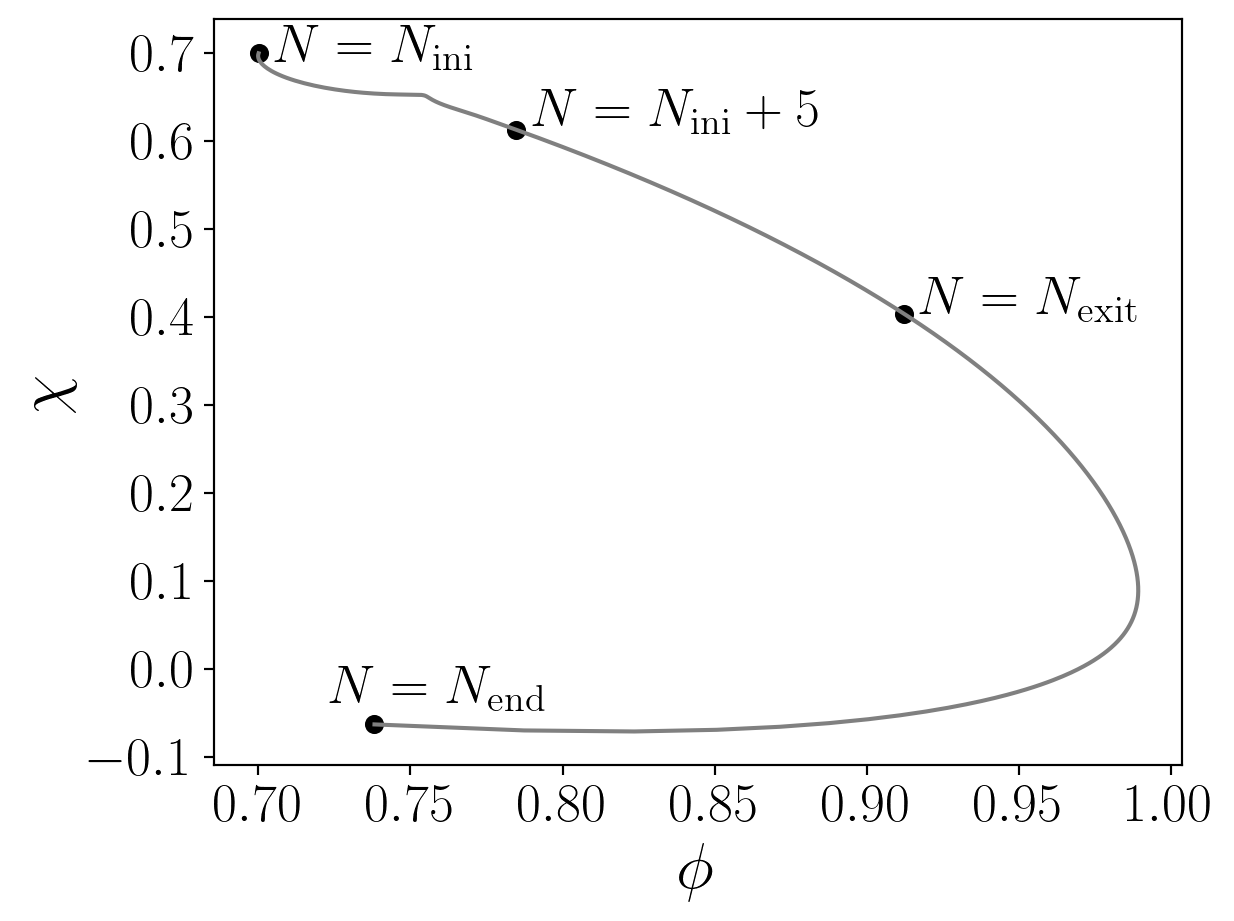

In [12]:
num_points_plot = 10_000 # Number of poitns to use in the plot
Nplot = np.linspace(Nini, Nend, num_points_plot)

plt.plot(phix(Nplot), phiy(Nplot), c='gray')
plt.scatter([phix(Nini), phix(Nini+5.), phix(Nexit), phix(Nend)],
            [phiy(Nini), phiy(Nini+5.), phiy(Nexit), phiy(Nend)],
            c="k")
plt.annotate("$N = N_{\\rm ini}$", (phix(Nini)+0.005, phiy(Nini)-0.01), fontsize=20)
plt.annotate("$N = N_{\\rm ini}+5$", (phix(Nini+5.)+0.005, phiy(Nini+5.)+0.005), fontsize=20)
plt.annotate("$N = N_{\\rm exit}$", (phix(Nexit)+0.005, phiy(Nexit)), fontsize=20)
plt.annotate("$N = N_{\\rm end}$", (phix(Nend)-0.015, phiy(Nend)+0.025), fontsize=20)
plt.xlabel(r'$\phi$', fontsize=24)
plt.ylabel(r'$\chi$', fontsize=24)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.tight_layout()
plt.savefig("output/background/background.png")

In [13]:
import pickle
from itertools import combinations_with_replacement, product
from typing import List

import numdifftools as nd
from sympy.utilities import lambdify

from background import get_background, get_background_func
from curved import dotG, eperp2d, epll, magG

In [14]:
def get_Hs(back: np.ndarray, params: dict) -> tuple:
    pval = np.array(list(params.values()))
    Hs = np.array([PyT.H(elem, pval) for elem in back[:, 1:]])
    return np.hstack((back[:, 0].reshape(-1,1), Hs.reshape(-1,1)))

def get_H_func(back: np.ndarray, params: dict) -> Callable:
    phix, phiy, phidotx, phidoty = get_background_func(back)
    pval = np.array(list(params.values()))
    return lambda N: PyT.H(np.array((phix(N),phiy(N), phidotx(N), phidoty(N))), pval)

def get_epsilons(back: np.ndarray, params: dict) -> tuple:
    dN = back[1, 0] - back[0, 0]
    Hs = get_Hs(back, params)[:, 1]
    epsilons = -np.gradient(Hs, dN)/Hs
    return np.hstack((back[:, 0].reshape(-1,1), epsilons.reshape(-1,1)))

def get_epsilon_func(back: np.ndarray, params: dict) -> Callable:
    H = get_H_func(back, params)
    return lambda N: -nd.Derivative(H)(N) / H(N)

def get_phi_primes(back: np.ndarray, params: dict) -> tuple:
    nF = PyT.nF()
    Hs = get_Hs(back, params)[:, 1]
    phi_primes = (back[:, nF+1:].T / Hs).T
    return np.hstack((back[:, 0].reshape(-1,1), phi_primes))

def get_phi_prime_func(back: np.ndarray, params: dict) -> Callable:
    _, _, phidotx, phidoty = get_background_func(back)
    H_func = get_H_func(back, params)
    return lambda N: np.array([phidotx(N), phidoty(N)]) / H_func(N)

def get_phi_double_primes(back: np.ndarray, params: dict) -> tuple:
    dN = back[1, 0] - back[0, 0]
    phi_primes = get_phi_primes(back, params)[:, 1:]
    phi_double_primes = np.gradient(phi_primes.T, dN, axis=1).T
    return np.hstack((back[:, 0].reshape(-1,1), phi_double_primes))

def get_phi_double_prime_func(back: np.ndarray, params: dict) -> Callable:
    phiprime = get_phi_prime_func(back, params)
    return lambda N: nd.Derivative(phiprime)(N)

def get_metric_sympy():
    with open("./output/setup/G.txt", "rb") as file:
        G = pickle.load(file)

    return G

def get_metric_fieldsfunc(params: dict) -> Callable:
    nF = PyT.nF()
    G = get_metric_sympy()
    pval = list(params.values())
    params_subs = {'p_'+str(ii): pval[ii] for ii in range(len(pval))}

    return lambdify(['f_'+str(ii) for ii in range(nF)], G.subs(params_subs))

def get_metric_func(back: np.ndarray, params: dict) -> Callable:
    G_fieldsfunc = get_metric_fieldsfunc(params)
    phix, phiy, *_ = get_background_func(back)

    return lambda N: G_fieldsfunc(phix(N), phiy(N))

def get_metrics(back: np.ndarray, params: dict) -> np.ndarray:
    nF = PyT.nF()
    phis = back[:, 1:nF+1]    
    G = get_metric_fieldsfunc(params)
    return np.array([G(phi[0], phi[1]) for phi in phis])

def get_christoffel_fieldfunc(params: dict) -> List[Callable]:
    nF, nP = PyT.nF(), PyT.nP()
    Gamma_sympy = PyTransSetup.fieldmetric(get_metric_sympy(), nF, nP)[1]

    Gamma_func = np.empty((nF, nF, nF)).tolist()
    pval = list(params.values())
    params_subs = {'p_'+str(ii): pval[ii] for ii in range(len(pval))}
    for aa, (bb, cc) in product(range(1, nF+1), combinations_with_replacement(range(1, nF+1), 2)):
        Gamma_func[aa-1][bb-1][cc-1] = Gamma_sympy(-aa, bb, cc).subs(params_subs)
        if bb != cc:
            Gamma_func[aa-1][cc-1][bb-1] = Gamma_func[aa-1][bb-1][cc-1]

    return lambdify(['f_'+str(ii) for ii in range(nF)], Gamma_func)

def get_christoffel_func(back: np.ndarray, params: dict) -> List[Callable]:
    Gamma_fieldsfunc = get_christoffel_fieldfunc(params)
    phix, phiy, *_ = get_background_func(back)

    return lambda N: Gamma_fieldsfunc(phix(N), phiy(N))

def get_christoffels(back: np.ndarray, params: dict) -> np.ndarray:
    nF = PyT.nF()
    phis = back[:, 1:nF+1]
    Gamma_func = get_christoffel_fieldfunc(params)
    Gammas = np.array([Gamma_func(phi[0], phi[1]) for phi in phis])

    return Gammas

def get_etas(back: np.ndarray, params: dict) -> np.ndarray:
    nF = PyT.nF()
    Gammas = get_christoffels(back, params)
    phi_primes = get_phi_primes(back, params)[:, 1:]
    etas = get_phi_double_primes(back, params)[:, 1:]
    for ii in range(len(back[:, 0])):
        for aa in range(nF):
            etas[ii, aa] += sum([Gammas[ii, aa, bb, cc] * phi_primes[ii, bb] * phi_primes[ii, cc]
                                for bb, cc in product(range(nF), repeat=2)])

    return np.hstack((back[:, 0].reshape(-1, 1), etas))

def get_eta_func(back: np.ndarray, params: dict) -> Callable:
    nF = PyT.nF()
    Gammas = get_christoffel_func(back, params)
    phi_prime = get_phi_prime_func(back, params)

    return lambda N: get_phi_double_prime_func(back, params)(N) + phi_prime(N) @ Gammas(N) @ phi_prime(N)

def get_kin_basis(back: np.ndarray, params: dict) -> np.ndarray:
    nF = PyT.nF()
    Gs = get_metrics(back, params)
    etas = get_etas(back, params)[:, 1:]
    eplls = np.array([epll(Gs[ii], back[ii, nF+1:]) for ii in range(len(back[:, 0]))])
    eperps = np.array([eperp2d(Gs[ii], back[ii, nF+1:], etas[ii]) for ii in range(len(back[:, 0]))])
    return np.hstack((back[:, 0].reshape(-1,1), eplls, eperps))

def get_kin_basis_func(back: np.ndarray, params: dict) -> Callable:
    _, _, phidotx, phidoty = get_background_func(back)
    G = get_metric_func(back, params)
    eta = get_eta_func(back, params)

    return lambda N: epll(G(N), np.array([phidotx(N), phidoty(N)])), \
        lambda N: eperp2d(G(N), np.array([phidotx(N), phidoty(N)]), eta(N))

def get_eta_parallel_perp(back: np.ndarray, params: dict) -> np.ndarray:
    nF = PyT.nF()
    Gs = get_metrics(back, params)
    etas = get_etas(back, params)[:, 1:]
    eplls, eperps = get_kin_basis(back, params)[:, 1:nF+1], get_kin_basis(back, params)[:, nF+1:]
    etaplls = np.array([dotG(Gs[ii], etas[ii], eplls[ii]) for ii in range(len(back[:, 0]))])
    etaperps = np.array([dotG(Gs[ii], etas[ii], eperps[ii]) for ii in range(len(back[:, 0]))])

    return np.hstack((back[:, 0].reshape(-1,1), etaplls.reshape(-1,1), etaperps.reshape(-1,1)))

def get_eta_parallel_perp_func(back: np.ndarray, params: dict) -> np.ndarray:
    G = get_metric_func(back, params)
    eta = get_eta_func(back, params)
    eplls, eperps = get_kin_basis_func(back, params)

    return lambda N: dotG(G(N), eta(N), eplls(N)), lambda N: dotG(G(N), eta(N), eperps(N))

In [15]:
# Hs = get_Hs(back, params)
# H_func = get_H_func(back, params)

# Nplot = np.linspace(Nini, Nend, num_points_plot)

# plt.plot(Nplot, [H_func(_) for _ in Nplot], c="gray", linewidth=2)
# plt.scatter(Hs[::len(Hs)//50, 0], Hs[::len(Hs)//50, 1], c="k")
# plt.xlabel(r'$N$', fontsize=20)
# plt.ylabel(r'$H$', fontsize=20)
# plt.yscale('log')
# plt.xticks(fontsize=14)
# plt.yticks(fontsize=14)
# plt.tight_layout()
# plt.savefig("./output/background/Hs.png")

In [16]:
# epsilons = get_epsilons(back, params)
# epsilon_func = get_epsilon_func(back, params)

# plt.plot(Nplot, [epsilon_func(_) for _ in Nplot], c="gray", linewidth=2)
# plt.scatter(epsilons[::len(epsilons)//50, 0], epsilons[::len(epsilons)//50, 1], c="k")
# plt.xlabel(r'$N$', fontsize=20)
# plt.ylabel(r'$\epsilon$', fontsize=20)
# plt.yscale('log')
# plt.xticks(fontsize=14)
# plt.yticks(fontsize=14)
# plt.tight_layout()
# plt.savefig("./output/background/epsilons.png")

In [17]:
# etaskin = get_eta_parallel_perp(back, params)
# etaplls, etaperps = etaskin[:, 1], etaskin[:, 2]
# etapll_func, etaperp_func = get_eta_parallel_perp_func(back, params)

In [18]:
# plt.plot(Nplot, np.abs([etapll_func(_) for _ in Nplot]), c="gray", linewidth=2)
# plt.scatter(back[::len(back)//50, 0], np.abs(etaplls)[::len(back)//50], c="k")
# plt.xlabel(r'$N$', fontsize=20)
# plt.ylabel(r'$\vert \eta_\parallel \vert$', fontsize=20)
# plt.yscale('log')
# plt.xticks(fontsize=14)
# plt.yticks(fontsize=14)
# plt.tight_layout()
# plt.savefig("./output/background/etaplls.png")

In [19]:
# plt.plot(Nplot, [etaperp_func(_) for _ in Nplot], c="gray", linewidth=2)
# plt.scatter(back[::len(back)//50, 0], etaperps[::len(back)//50], c="k")
# plt.xlabel(r'$N$', fontsize=20)
# plt.ylabel(r'$\eta_\perp$', fontsize=20)
# plt.yscale('log')
# plt.xticks(fontsize=14)
# plt.yticks(fontsize=14)
# plt.tight_layout()
# plt.savefig("./output/background/etaperps.png")

In [20]:
# omegas = etaperps / np.sqrt(2*epsilons[:, 1])

# plt.plot(back[:, 0], omegas, c="gray", linewidth=2)
# plt.xlabel(r'$N$', fontsize=20)
# plt.ylabel(r'$\omega$', fontsize=20)
# plt.yscale('log')
# plt.xticks(fontsize=14)
# plt.yticks(fontsize=14)
# plt.tight_layout()
# plt.savefig("./output/background/omegas.png")

In [21]:
from slowroll import (get_epsilon_func, get_epsilons, get_eta_func, get_etas,
                      get_metric_func, get_metrics)

import PyTransScripts as PyS


def get_2pt_initial(back: np.ndarray, params: dict, efolds_before: float, NB: float = 8.):
    pval = np.array(list(params.values()))
    
    Ns = back[:, 0]
    Nexit = Ns[-1] - efolds_before

    k = PyS.kexitN(Nexit, back, pval, PyT)
    Nstart, backExitMinus = PyS.ICsBE(NB, k, back, pval, PyT)

    return k, Nstart, backExitMinus

def get_2pts(back: np.ndarray, params: dict, efolds_before: float, NB: float = 8., tol: float = 1e-16) -> tuple:
    pval = np.array(list(params.values()))
    k, Nstart, backExitMinus = get_2pt_initial(back, params, efolds_before, NB)
    
    Ns = back[:, 0]
    Nev = Ns[Ns >= Nstart]
    tols = np.array([tol, tol])
    twoPt = PyT.sigEvolve(Nev, k, backExitMinus, pval, tols, True)

    Nsig = twoPt[:, 0]
    Pzeta = twoPt[:, 1]
    sigma = twoPt[:, 1+1+2*nF:].reshape(len(Nsig), 2*nF, 2*nF)
    Pphi = sigma[:, :nF, :nF]

    k_deformed = k + 0.01*k
    twoPt_deformed = PyT.sigEvolve(Nev, k_deformed, backExitMinus, pval, tols, True)
    Pzeta_deformed = twoPt_deformed[:, 1]

    ns = (np.log(Pzeta_deformed[-1])-np.log(Pzeta[-1])) / (np.log(k_deformed)-np.log(k)) + 4.0
    Pzeta = Pzeta * k**3 / 2 / np.pi**2

    return Nsig, Pphi, Pzeta, k, ns

def get_2pts_func(back: np.ndarray, params: dict, efolds_before: float, NB: float = 8., tol: float = 1e-16) -> tuple:
    nF = PyT.nF()
    pval = np.array(list(params.values()))
    
    k, Nstart, backExitMinus = get_2pt_initial(back, params, efolds_before, NB)

    Ns = back[:, 0]
    Nev = Ns[Ns >= Nstart]
    tols = np.array([tol, tol])
    twoPt = PyT.sigEvolve(Nev, k, backExitMinus, pval, tols, True)

    Nsig = twoPt[:, 0]
    Pzeta = twoPt[:, 1]
    sigma = twoPt[:, 1+1+2*nF:].reshape(len(Nsig), 2*nF, 2*nF)
    Pphi = sigma[:, :nF, :nF]

    k_deformed = k + 0.001*k
    twoPt_deformed = PyT.sigEvolve(Nev, k_deformed, backExitMinus, pval, tols, True)
    Pzeta_deformed = twoPt_deformed[:, 1]
    ns = (np.log(Pzeta_deformed[-1])-np.log(Pzeta[-1])) / (np.log(k_deformed)-np.log(k)) + 4.0

    Pzeta_nodim = Pzeta * k**3 / 2 / np.pi**2

    Pphi_func = lambda N: np.array([np.interp(N, Nsig, Pphi[:, aa, bb]) for aa, bb in product(range(nF), repeat=2)]).reshape(nF, nF)

    return Nsig, Pphi_func, lambda N: np.interp(N, Nsig, Pzeta_nodim), k, ns

def get_PR_PS_CRS(back: np.ndarray, params: dict, efolds_before: float, NB: float = 8., tol: float = 1e-8):
    Nsig, Pphi, _, k, _ = get_2pts(back, params, efolds_before, NB, tol)
    
    back = back[back.T[0] >= Nsig[0]]
    phidots = back[:, 3:]
    epsilons = get_epsilons(back, params)[:, 1]
    etas = get_etas(back, params)[:, 1:]
    Gs = get_metrics(back, params)

    PR = np.array([epll(Gs[ii], phidots[ii]) @ Gs[ii] @ Pphi[ii] @ Gs[ii] @ epll(Gs[ii], phidots[ii])
                for ii in range(len(Nsig))]) / 2 / epsilons
    PR = PR * k**3 / 2 / np.pi**2
    CRS = np.array([epll(Gs[ii], phidots[ii]) @ Gs[ii] @ Pphi[ii] @ Gs[ii] @ eperp2d(Gs[ii], phidots[ii], etas[ii])
                for ii in range(len(Nsig))]) / 2 / epsilons
    CRS = CRS * k**3 / 2 / np.pi**2
    PS = np.array([eperp2d(Gs[ii], phidots[ii], etas[ii]) @ Gs[ii] @ Pphi[ii] @ Gs[ii] @ eperp2d(Gs[ii], phidots[ii], etas[ii])
                for ii in range(len(Nsig))]) / 2 / epsilons
    PS = PS * k**3 / 2 / np.pi**2
    return PR, CRS, PS

def get_PR_PS_CRS_func(back: np.ndarray, params: dict, efolds_before: float, NB: float = 8., tol: float = 1e-8) -> tuple:
    _, _, phidotx, phidoty = get_background_func(back)
    _, Pphi, _, k, _ = get_2pts_func(back, params, efolds_before, NB, tol)

    epsilon = get_epsilon_func(back, params)
    eta = get_eta_func(back, params)
    G = get_metric_func(back, params)

    PR = lambda N: epll(G(N), np.array([phidotx(N), phidoty(N)])) @ G(N) @ Pphi(N) @ G(N) @ \
        epll(G(N), np.array([phidotx(N), phidoty(N)])) * k**3 / 4 / np.pi**2 / epsilon(N)
    CRS = lambda N: epll(G(N), np.array([phidotx(N), phidoty(N)])) @ G(N) @ Pphi(N) @ G(N) @ \
        eperp2d(G(N), np.array([phidotx(N), phidoty(N)]), eta(N)) * k**3 / 4 / np.pi**2 / epsilon(N)
    PS = lambda N: eperp2d(G(N), np.array([phidotx(N), phidoty(N)]), eta(N)) @ G(N) @ Pphi(N) @ G(N) @ \
        eperp2d(G(N), np.array([phidotx(N), phidoty(N)]), eta(N)) * k**3 / 4 / np.pi**2 / epsilon(N)

    return PR, CRS, PS

In [22]:
Nsig, Pphi, Pzeta, k, ns = get_2pts(back, params, efolds_before)
print("ns: ", ns)

ns:  0.9652386385349612


In [23]:
# Nsig, Pphi, Pzeta, k, ns = get_2pts_func(back, params, efolds_before)
# print("ns: ", ns)

# Nplot = np.linspace(Nsig[0], Nsig[-1], num_points_plot)
# Pphis = np.array([Pphi(_) for _ in Nplot])

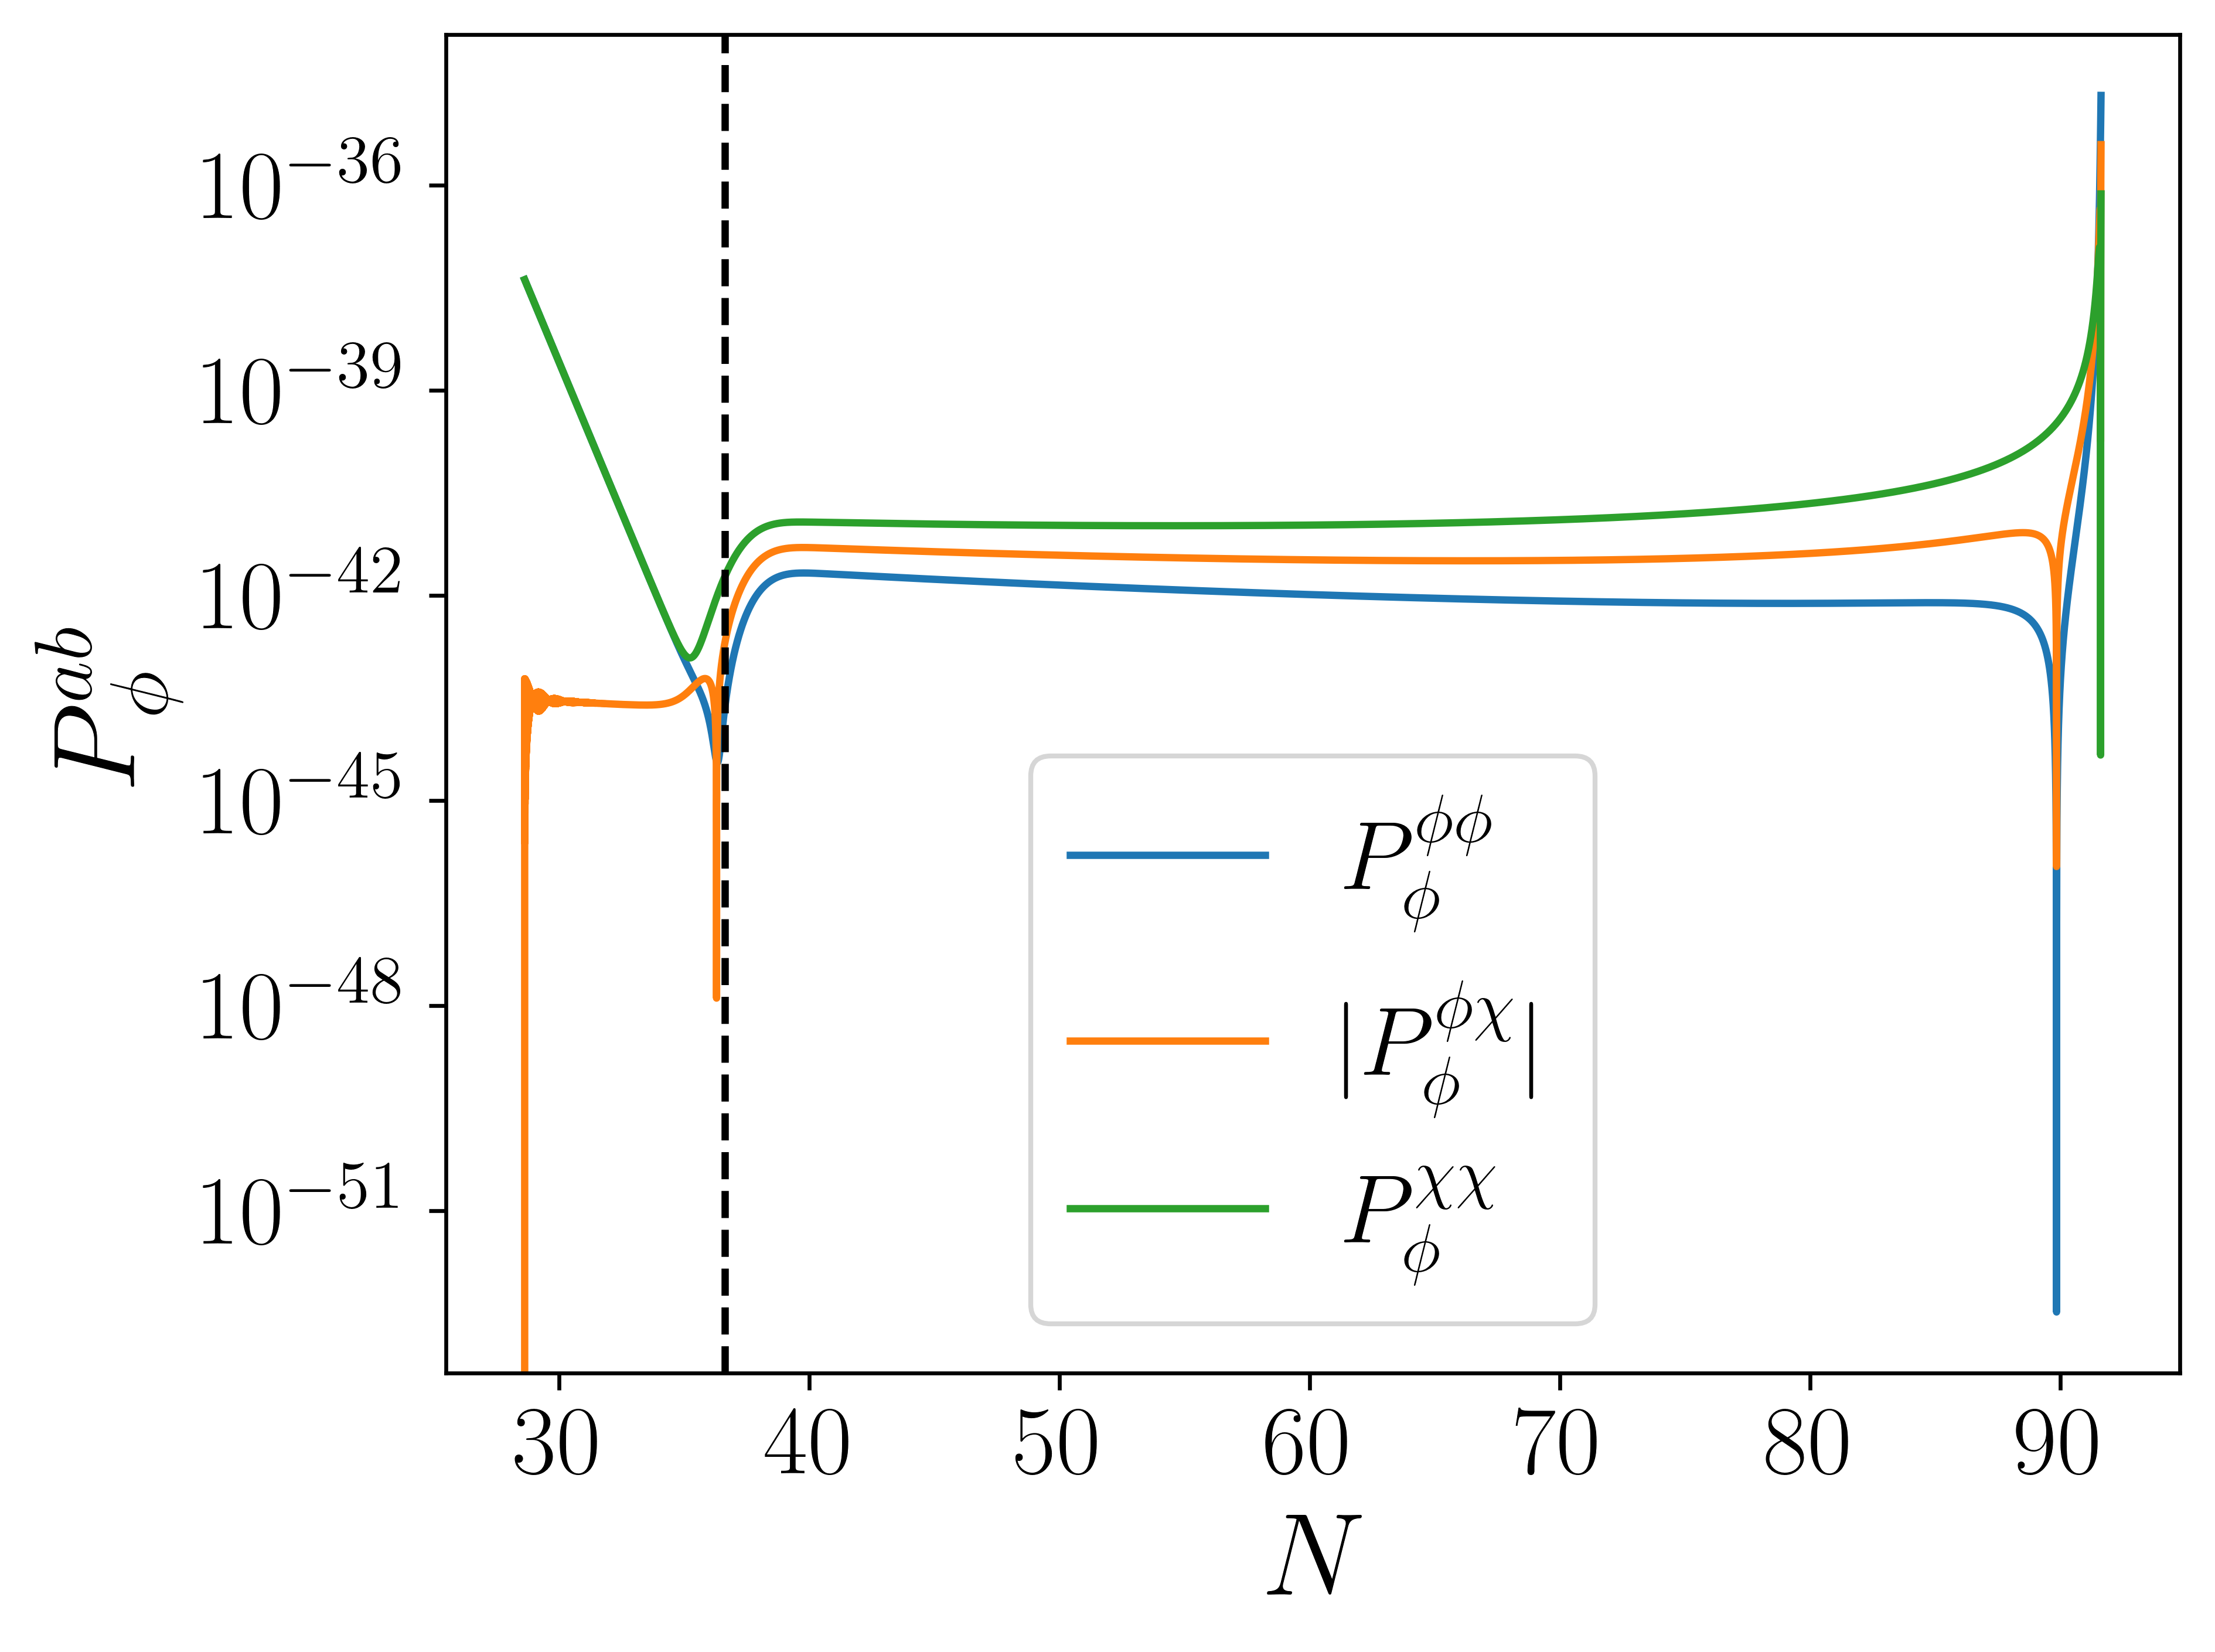

In [30]:
plt.plot(Nsig, Pphi[:, 0, 0], label=r"$P^{\phi\phi}_\phi$")
plt.plot(Nsig, np.abs(Pphi[:, 0, 1]), label=r"$\vert P^{\phi\chi}_\phi \vert$")
plt.plot(Nsig, Pphi[:, 1, 1], label=r"$P^{\chi\chi}_\phi$")
plt.axvline(Nexit, c='k', linestyle='--')
plt.legend(fontsize=20)
plt.ylabel(r'$P^{ab}_\phi$', fontsize=24) 
plt.xlabel(r'$N$', fontsize=24)
plt.yscale('log')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.tight_layout()
plt.savefig("./output/2pt/2pt.png")

In [24]:
PR, CRS, PS = get_PR_PS_CRS_func(back, params, efolds_before)
print(f"""At horizon crossing:
PR = {PR(Nexit):.3}
CRS = {CRS(Nexit):.3}
PS = {PS(Nexit):.3}""")

At horizon crossing:
PR = 2.05e-10
CRS = 6.66e-11
PS = 2.18e-11


In [25]:
PRs, CRSs, PSs = get_PR_PS_CRS(back, params, efolds_before)

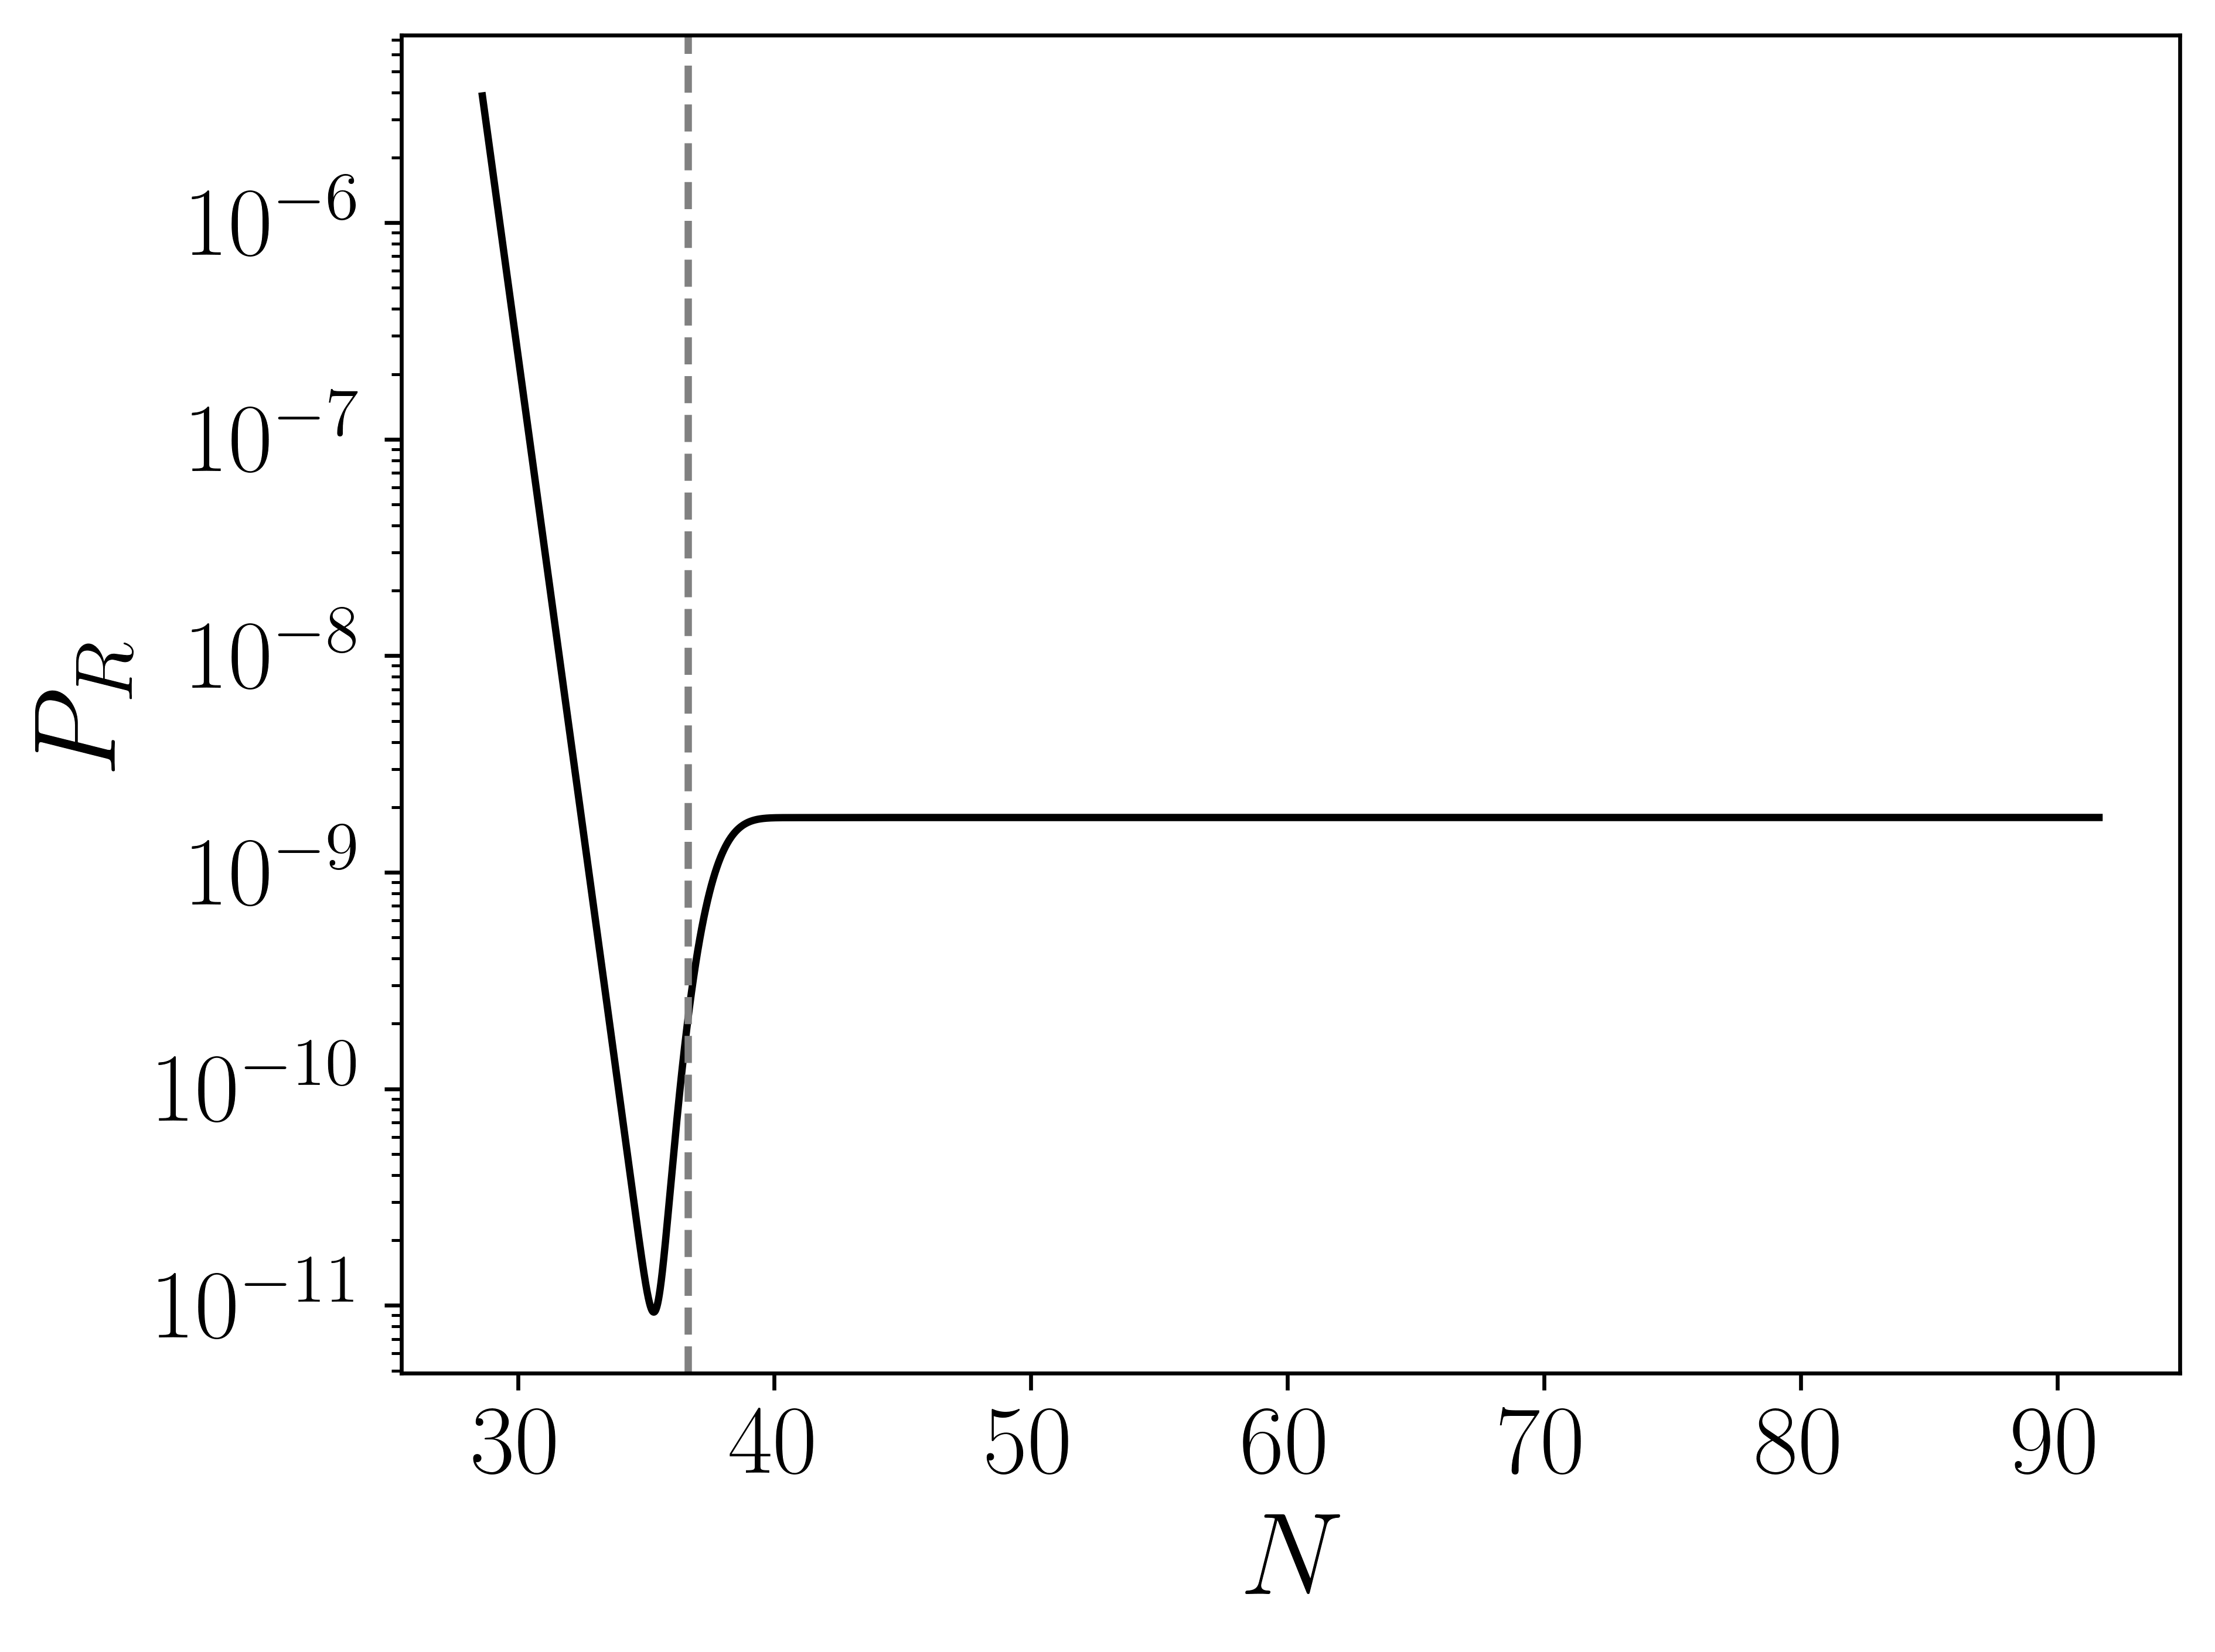

In [26]:
plt.plot(Nsig, PRs, c='k')
plt.axvline(Nexit, c='gray', linestyle='--')
plt.ylabel(r'$P_R$', fontsize=24) 
plt.xlabel(r'$N$', fontsize=24)
plt.yscale('log')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.tight_layout()
plt.savefig("./output/2pt/PR_5m.png")

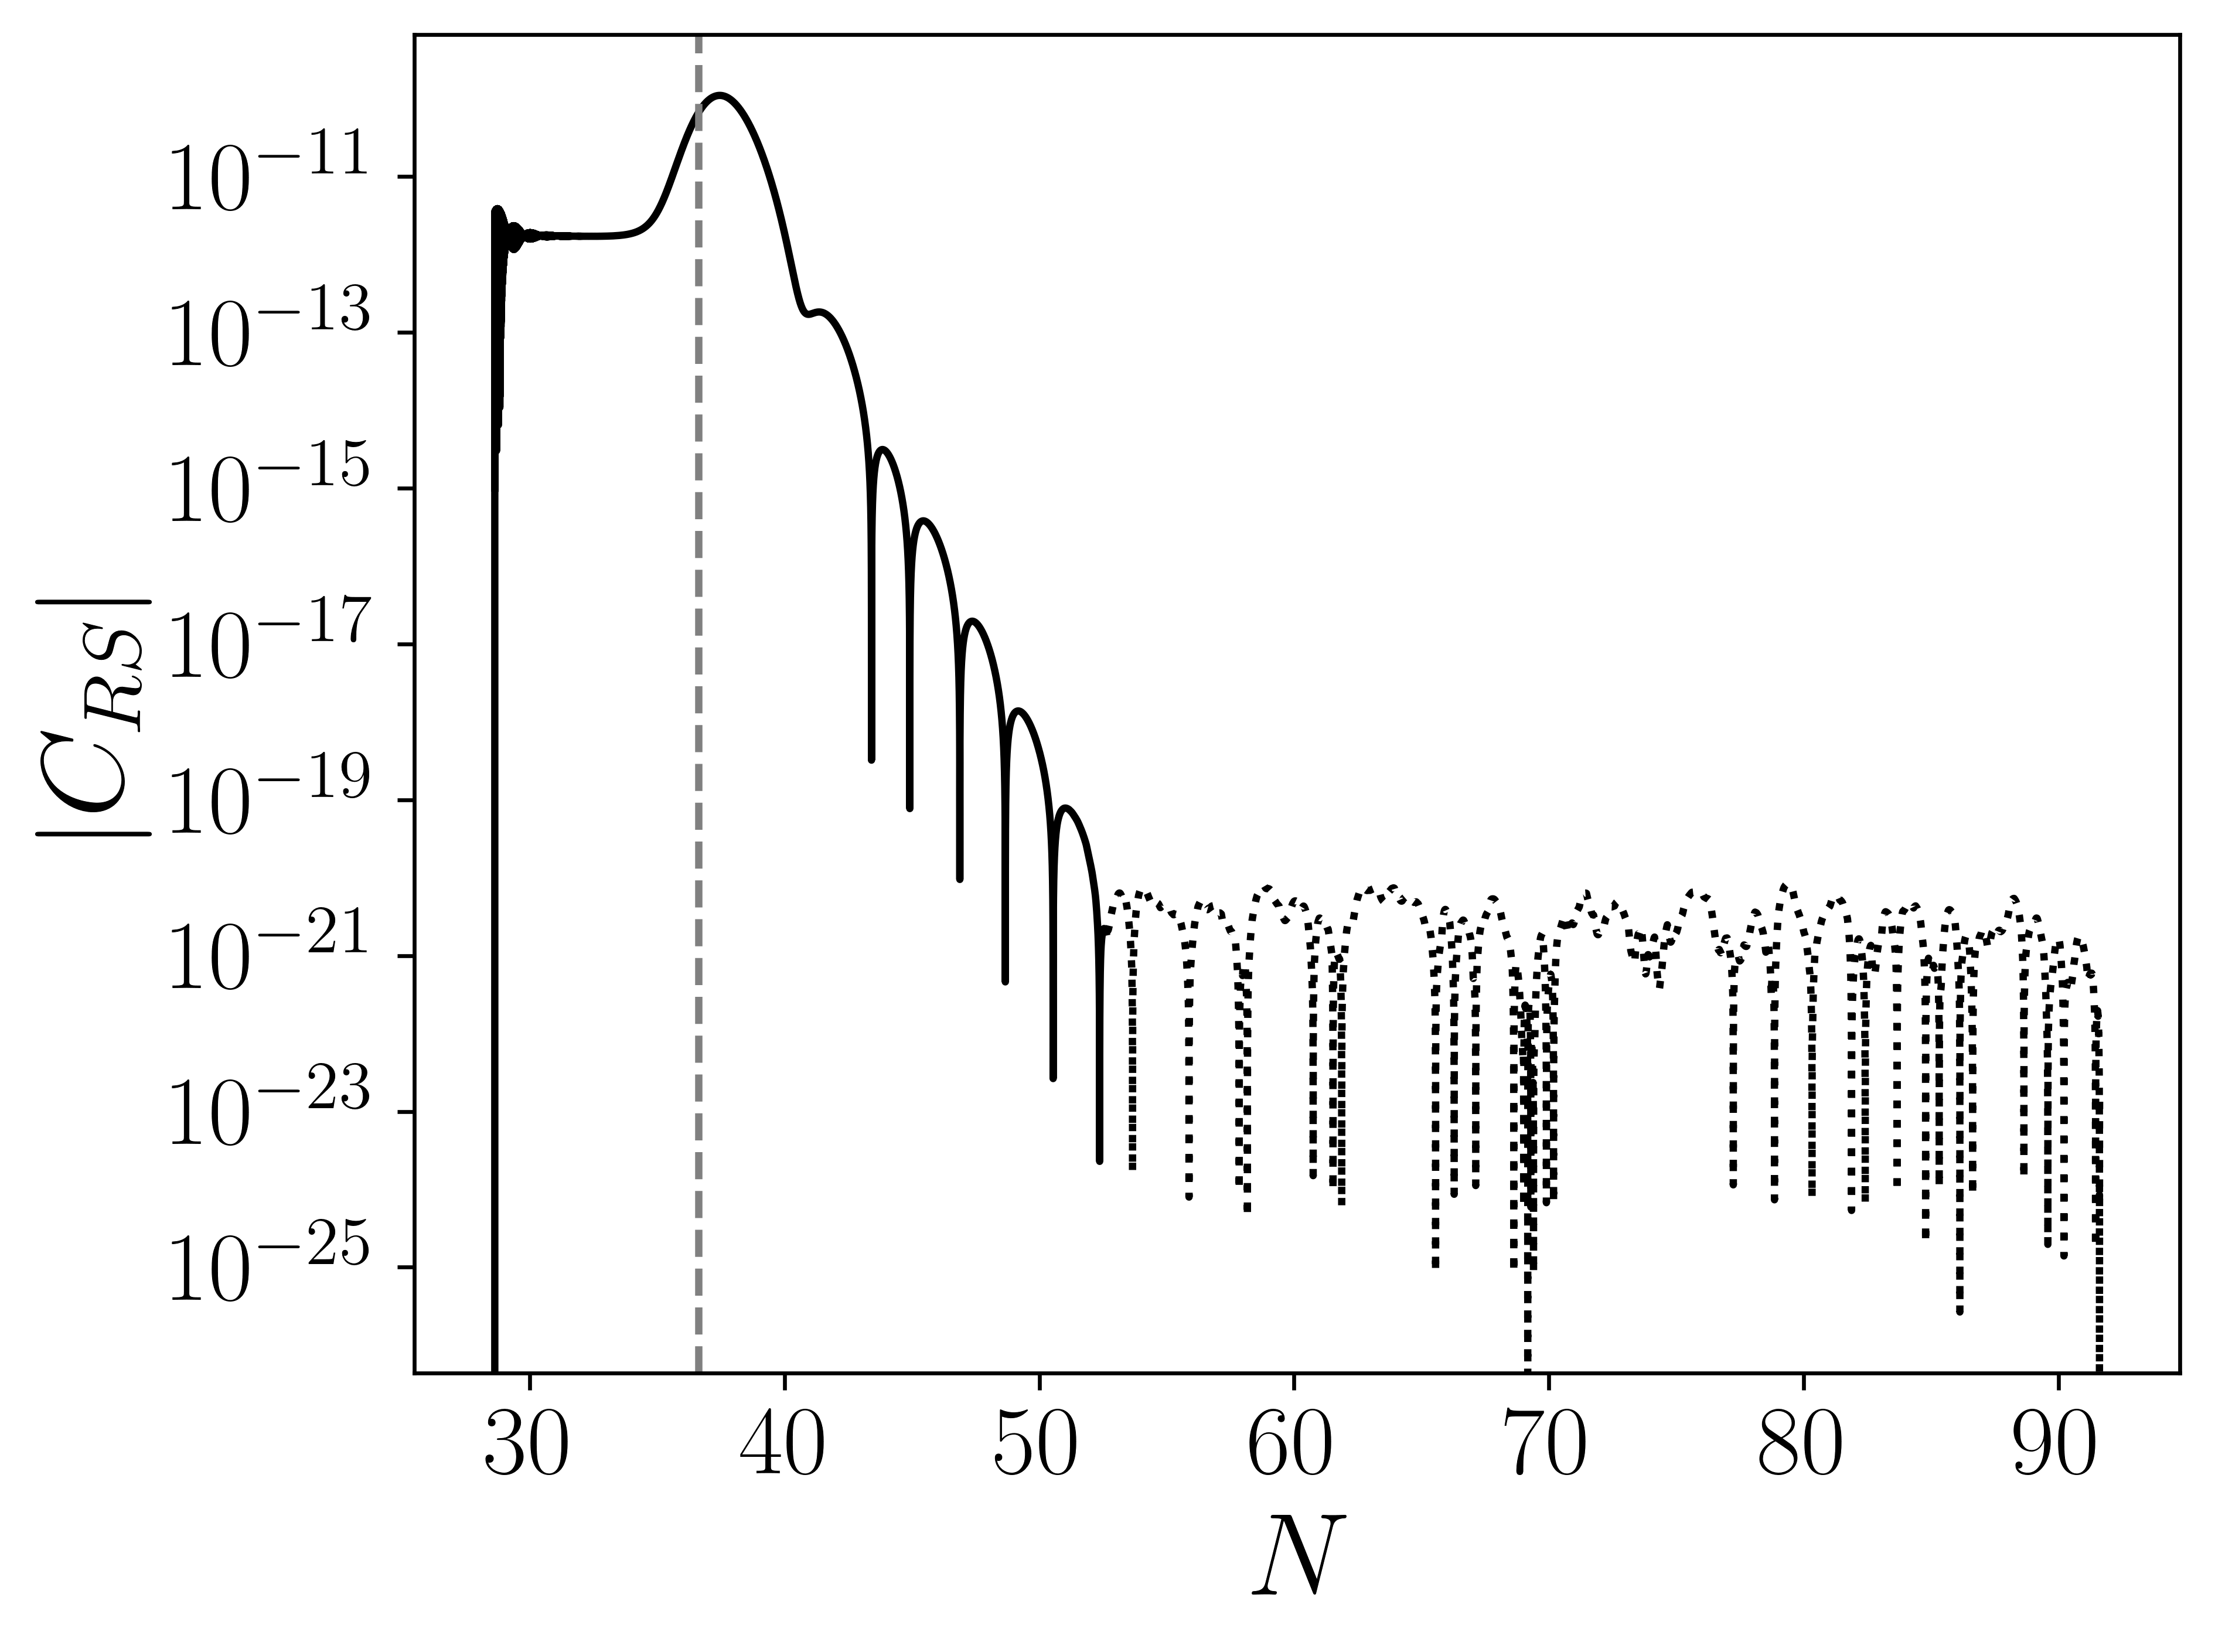

In [70]:
cut = 1_200_000
plt.plot(Nsig[:cut:10], np.abs(CRSs)[:cut:10], c='k')
plt.plot(Nsig[cut::10], np.abs(CRSs)[cut::10], c='k', linestyle='dotted')
plt.axvline(Nexit, c='gray', linestyle='--')
plt.ylabel(r'$\vert C_{RS} \vert$', fontsize=24) 
plt.xlabel(r'$N$', fontsize=24)
plt.yscale('log')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.tight_layout()
plt.savefig("./output/2pt/CRS.png")

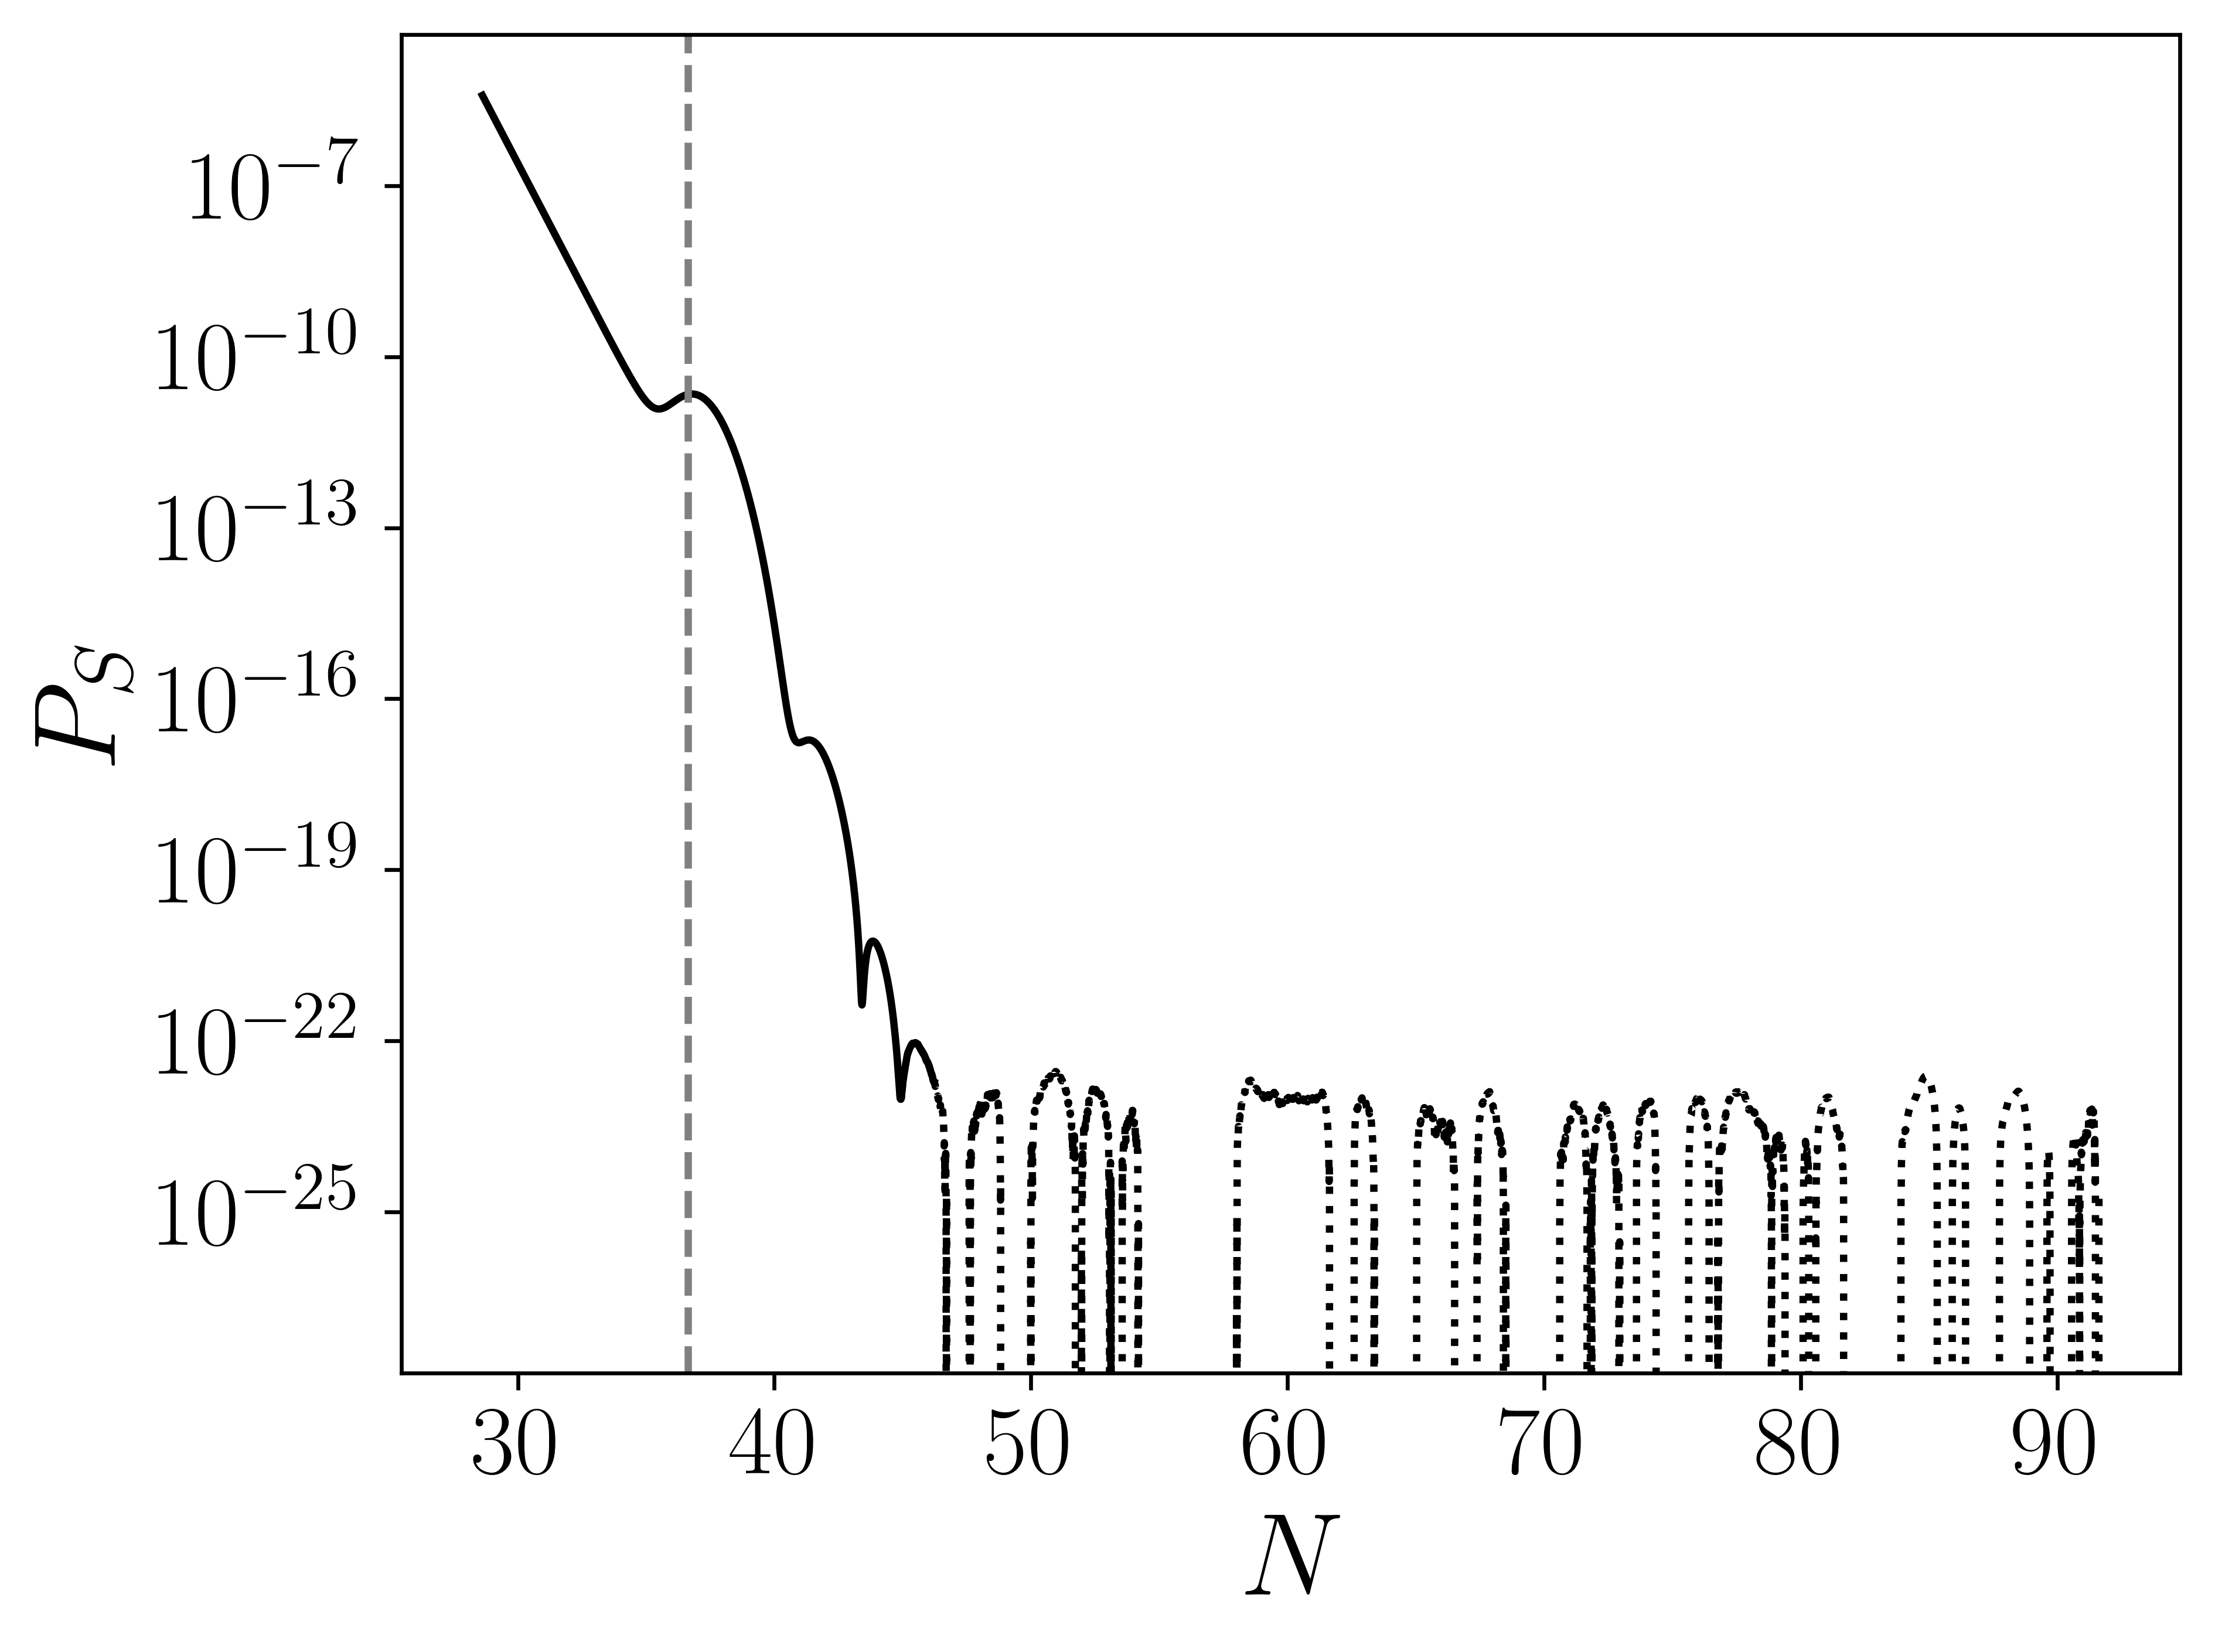

In [66]:
cut2 = 880_000
plt.plot(Nsig[:cut2:200], PSs[:cut2:200], c='k')
plt.plot(Nsig[cut2::200], PSs[cut2::200], c='k', linestyle='dotted')
# plt.plot(Nsig, PSs, linestyle="dotted", c='k')
plt.axvline(Nexit, c='gray', linestyle='--')
plt.ylabel(r'$P_S$', fontsize=24) 
plt.xlabel(r'$N$', fontsize=24)
plt.yscale('log')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.tight_layout()
plt.savefig("./output/2pt/PS.png")

In [ ]:
alpha = 0.
beta = 1/3.

k1 = k/2 - beta*k/2.
k2 = k/4*(1+alpha+beta)
k3 = k/4*(1-alpha+beta)
kM = np.min(np.array([k1, k2, k3]))

back3pt = back[::len(back)//1_000]

pval = np.array(list(params.values()))

In [ ]:
NBs = [6.0, 8.0, 10.0]

for NB in NBs:
    Nstart, backExitMinus = PyS.ICsBM(NB, kM, back3pt, pval, PyT)
    print(f"3-pt calculation starts at: {Nstart} e-folds")
    
    Ns =  back3pt.T[0]
    Nev = Ns[Ns >= Nstart]
    tols = np.array([10**-8, 10**-8])
    threePt = PyT.alphaEvolve(Nev, k1, k2, k3, backExitMinus, pval, tols, True)
    Nalpha = threePt[:, 0]
    Babc = threePt[:, 1 + 4 + 2*nF + 6*2*nF*2*nF:]
    # alpha = np.empty((len(Nalpha), nF, nF, nF))
    # for ii, jj, kk in combinations_with_replacement(range(nF), 3):
    #     alpha[:, ii, jj, kk] = Babc[:, ii + 2*nF*jj + 2*nF*2*nF*kk]
    Pzetas, B = threePt[:, 1:4], threePt[:, 4]

    fNL = 5.0/6.0*B/(Pzetas[:, 1]*Pzetas[:, 2]  + Pzetas[:, 0]*Pzetas[:, 1] + Pzetas[:, 0]*Pzetas[:, 2])
    print(f"fNL at the end of inflation: {fNL[-1]}")

In [ ]:
plt.plot(Nalpha, fNL, c='k')
plt.ylabel(r'$f_{\rm NL}$', fontsize=24)
plt.xlabel(r'$N$', fontsize=24)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.tight_layout()
plt.savefig("./output/3pt/fNL.png")